### Distribution of observations
To gain some understanding of the observation values, let's run a number of episodes using a random policy and record the observation values in lists and plot histograms showing the distribution of the values in those lists. Starting (restarting) the MDP starts each episode. Actions are randomly selected, and a step of the MDP is executed. This is done until the episode terminates, which means that the pole falls.

The CartPole environment provides four observation values at each step:
1.  **Cart Position:** The horizontal position of the cart (ranges roughly between -2.4 and 2.4).
2.  **Cart Velocity:** The horizontal velocity of the cart.
3.  **Pole Angle:** The angle of the pole from vertical (in radians).
4.  **Pole Angular Velocity:** The rate of change of the pole angle.

In [15]:
from matplotlib import pyplot as plt
import gymnasium as gym

env = gym.make('CartPole-v1')

The value ``n_episodes`` below set the number of episodes of the CartPole to be run. Each episode runs for some number of steps until it terminates, ``not terminated`` is ``False`` or terminated is True.

In [16]:
n_episodes = 100000
observations = []
initial_observations = []
terminal_observations = []
for _ in range(n_episodes):
    terminated = False
    obs,_ = env.reset()
    initial_observations.append(obs)
    observations.append(obs)
    while not terminated:
        action = env.action_space.sample()
        obs,_,terminated,_,_ = env.step(action)
        if terminated==True:
            terminal_observations.append(obs)
        observations.append(obs)

position = [observations[i][0] for i in range(len(observations))]
velocity = [observations[i][1] for i in range(len(observations))]
angular_position = [observations[i][2] for i in range(len(observations))]
angular_velocity = [observations[i][3] for i in range(len(observations))]

initial_position = [initial_observations[i][0] for i in range(len(initial_observations))]
initial_velocity = [initial_observations[i][1] for i in range(len(initial_observations))]
initial_angular_position = [initial_observations[i][2] for i in range(len(initial_observations))]
initial_angular_velocity = [initial_observations[i][3] for i in range(len(initial_observations))]

terminal_position = [terminal_observations[i][0] for i in range(len(terminal_observations))]
terminal_velocity = [terminal_observations[i][1] for i in range(len(terminal_observations))]
terminal_angular_position = [terminal_observations[i][2] for i in range(len(terminal_observations))]
terminal_angular_velocity = [terminal_observations[i][3] for i in range(len(terminal_observations))]

The code blocks below use Matplotlib to display histrograms of the values in the three lists
1. All observations
2. Terminal observations
3. Initial observations

#### Histograms: All Observations

This code generates a 2x2 grid of histograms showing the distribution of each of the four observation components across *all* time steps encountered during the simulations. `plt.subplots_adjust` is used to prevent titles and labels from overlapping. `bins=100` provides a reasonable granularity for viewing the distributions.

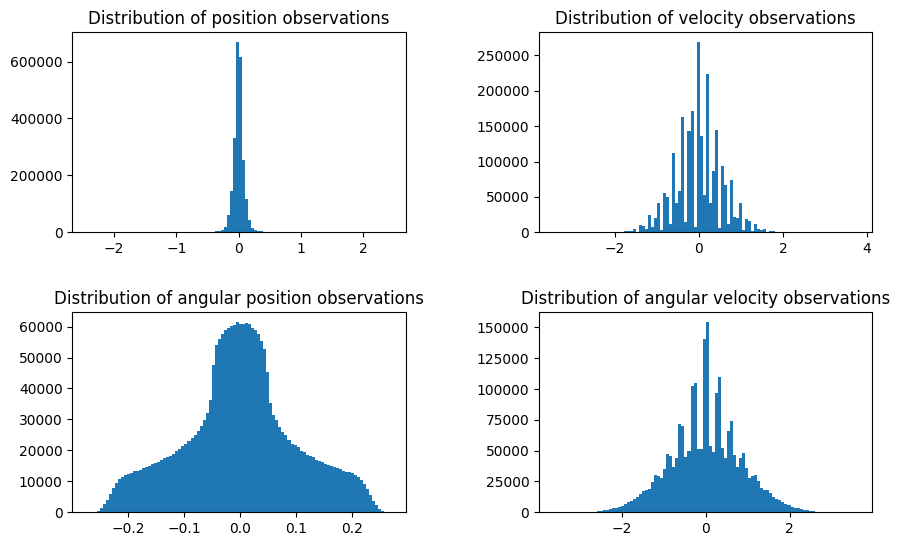

In [17]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(position,bins)
axs[0,0].set_title("Distribution of position observations")
axs[0,1].hist(velocity,bins)
axs[0,1].set_title("Distribution of velocity observations")
axs[1,0].hist(angular_position,bins)
axs[1,0].set_title("Distribution of angular position observations")
axs[1,1].hist(angular_velocity,bins)
axs[1,1].set_title("Distribution of angular velocity observations")
plt.show()

#### Histograms: Terminal Observations

Similar to the previous cell, this generates a 2x2 grid of histograms, but this time using only the observations recorded at the *final* step of each episode (i.e., just before termination). This helps understand the state of the system when the episode typically ends under a random policy.

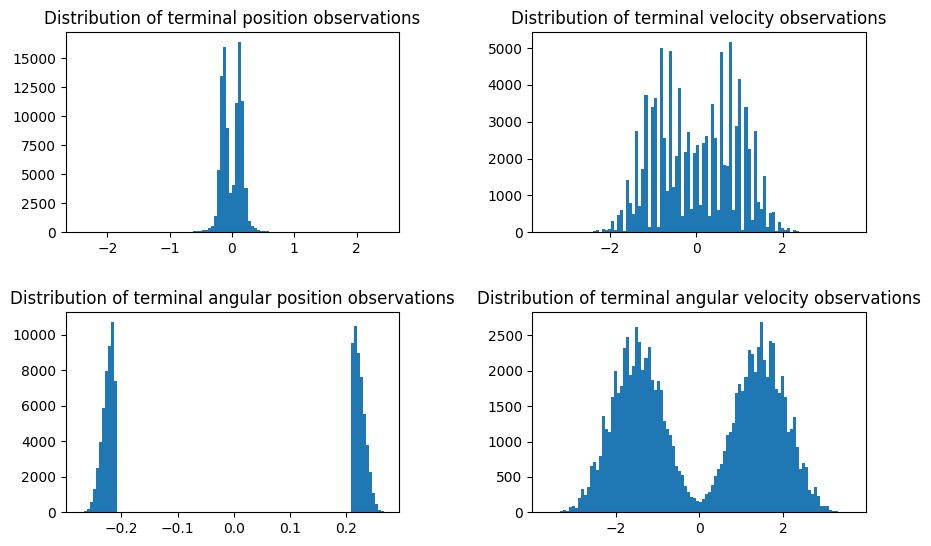

In [18]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(terminal_position,bins)
axs[0,0].set_title("Distribution of terminal position observations")
axs[0,1].hist(terminal_velocity,bins)
axs[0,1].set_title("Distribution of terminal velocity observations")
axs[1,0].hist(terminal_angular_position,bins)
axs[1,0].set_title("Distribution of terminal angular position observations")
axs[1,1].hist(terminal_angular_velocity,bins)
axs[1,1].set_title("Distribution of terminal angular velocity observations")
plt.show()

#### Histograms: Initial Observations

This cell generates histograms for the observations recorded at the *very beginning* of each episode (immediately after `env.reset()`). This shows the distribution from which the environment samples its starting states. According to the Gymnasium documentation, these initial values are drawn uniformly from the range [-0.05, 0.05].


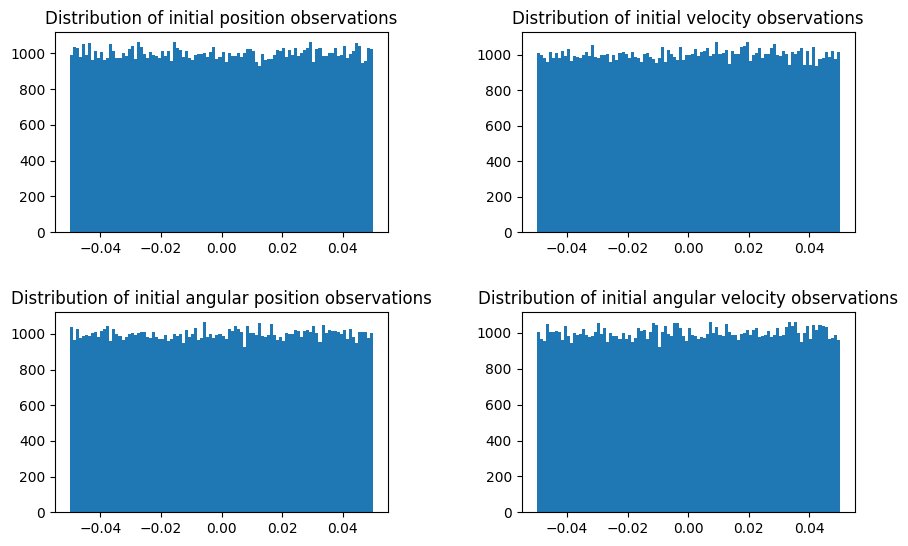

In [19]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(initial_position,bins)
axs[0,0].set_title("Distribution of initial position observations")
axs[0,1].hist(initial_velocity,bins)
axs[0,1].set_title("Distribution of initial velocity observations")
axs[1,0].hist(initial_angular_position,bins)
axs[1,0].set_title("Distribution of initial angular position observations")
axs[1,1].hist(initial_angular_velocity,bins)
axs[1,1].set_title("Distribution of initial angular velocity observations")
plt.show()

From the distribution histograms for all observations we might infer that
1. the position observation is generally in the interval [-0.5,0.5]
2. the velocity observation is generally in the interval [-2.0.2.0]
3. the angular position observation is in the interval [-0.28,0.28]
4. the angular velocity observation in in the interval [-2.5,2.5]

The distributions for the terminal observations show that
1. The position of the cart does not significantly change before the pole falls, for the random policy.
2. The when the angular position of the pole has an absolute value greater than 0.2 the pole falls.

The distribution of the initial observations shows that all values are in the interval [-0.05,0.05] when starting the episode.

In [20]:
import numpy as np

print("Summary Statistics for All Observations:")
print(f"  Position:         Mean={np.mean(position):.4f}, Std Dev={np.std(position):.4f}")
print(f"  Velocity:         Mean={np.mean(velocity):.4f}, Std Dev={np.std(velocity):.4f}")
print(f"  Angular Position: Mean={np.mean(angular_position):.4f}, Std Dev={np.std(angular_position):.4f}")
print(f"  Angular Velocity: Mean={np.mean(angular_velocity):.4f}, Std Dev={np.std(angular_velocity):.4f}")
print("\n")

print("Summary Statistics for Initial Observations:")
print(f"  Position:         Mean={np.mean(initial_position):.4f}, Std Dev={np.std(initial_position):.4f}")
print(f"  Velocity:         Mean={np.mean(initial_velocity):.4f}, Std Dev={np.std(initial_velocity):.4f}")
print(f"  Angular Position: Mean={np.mean(initial_angular_position):.4f}, Std Dev={np.std(initial_angular_position):.4f}")
print(f"  Angular Velocity: Mean={np.mean(initial_angular_velocity):.4f}, Std Dev={np.std(initial_angular_velocity):.4f}")
print("\n")

print("Summary Statistics for Terminal Observations:")
# Check if terminal_observations list is empty before calculating stats
if terminal_observations:
    print(f"  Position:         Mean={np.mean(terminal_position):.4f}, Std Dev={np.std(terminal_position):.4f}")
    print(f"  Velocity:         Mean={np.mean(terminal_velocity):.4f}, Std Dev={np.std(terminal_velocity):.4f}")
    print(f"  Angular Position: Mean={np.mean(terminal_angular_position):.4f}, Std Dev={np.std(terminal_angular_position):.4f}")
    print(f"  Angular Velocity: Mean={np.mean(terminal_angular_velocity):.4f}, Std Dev={np.std(terminal_angular_velocity):.4f}")
else:
    print("  No terminal observations recorded (perhaps n_episodes was too small or environment settings changed).")


Summary Statistics for All Observations:
  Position:         Mean=-0.0002, Std Dev=0.0972
  Velocity:         Mean=-0.0003, Std Dev=0.5544
  Angular Position: Mean=0.0000, Std Dev=0.1010
  Angular Velocity: Mean=0.0000, Std Dev=0.8371


Summary Statistics for Initial Observations:
  Position:         Mean=0.0000, Std Dev=0.0289
  Velocity:         Mean=0.0001, Std Dev=0.0288
  Angular Position: Mean=0.0001, Std Dev=0.0289
  Angular Velocity: Mean=0.0001, Std Dev=0.0289


Summary Statistics for Terminal Observations:
  Position:         Mean=-0.0002, Std Dev=0.1681
  Velocity:         Mean=0.0009, Std Dev=0.9271
  Angular Position: Mean=0.0001, Std Dev=0.2244
  Angular Velocity: Mean=-0.0010, Std Dev=1.6106
